# Class 8: Machine Learning

Iris models

## Getting data into Python

In [2]:
import pandas
df = pandas.read_csv( "Iris.csv" )

## Initial checking

In [3]:
df.shape

(150, 6)

In [3]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
Petal.Shape      object
dtype: object

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Shape
0,5.1,3.5,1.4,0.2,setosa,round
1,4.9,3.0,1.4,0.2,setosa,pointy
2,4.7,3.2,1.3,0.2,setosa,pointy
3,4.6,3.1,1.5,0.2,setosa,round
4,5.0,3.6,1.4,0.2,setosa,round


In [5]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Shape
145,6.7,3.0,5.2,2.3,virginica,pointy
146,6.3,2.5,5.0,1.9,virginica,pointy
147,6.5,3.0,5.2,2.0,virginica,round
148,6.2,3.4,5.4,2.3,virginica,round
149,5.9,3.0,5.1,1.8,virginica,pointy


In [6]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
Petal.Shape     0
dtype: int64

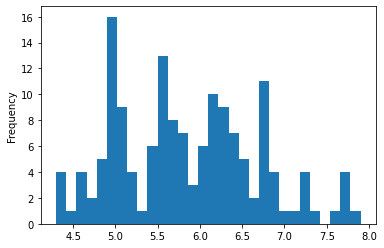

In [8]:
hist = df[ "Sepal.Length" ].plot.hist( bins = 30 )

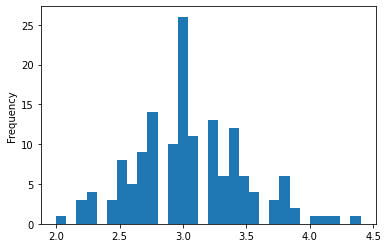

In [9]:
hist = df[ "Sepal.Width" ].plot.hist( bins = 30 )

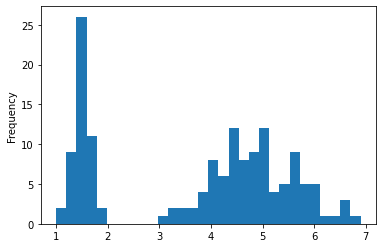

In [10]:
hist = df[ "Petal.Length" ].plot.hist( bins = 30 )

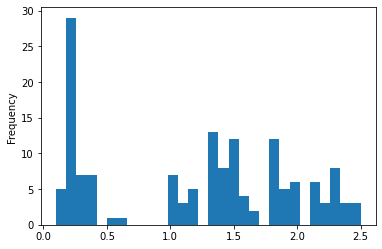

In [11]:
hist = df[ "Petal.Width" ].plot.hist( bins = 30 )

In [12]:
df[ "Petal.Shape" ].value_counts()

round     79
pointy    71
Name: Petal.Shape, dtype: int64

In [13]:
df[ "Species" ].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

# Setup

In [5]:
import sklearn
import sklearn.model_selection 
import sklearn.metrics
import numpy
numpy.random.seed( 28 )


C:\Users\karpovsk\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
outcome = df['Species']

In [16]:
outcome

0        Missed
1        Missed
2          Paid
3          Paid
4          Paid
          ...  
29995      Paid
29996      Paid
29997    Missed
29998    Missed
29999    Missed
Name: Payment, Length: 30000, dtype: object

In [7]:
numericFeatures = df[ [ 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width' ] ]

In [4]:
df['Petal.Shape'].value_counts()

round     79
pointy    71
Name: Petal.Shape, dtype: int64

In [8]:
dummiesShape = pandas.get_dummies( df['Petal.Shape'], prefix="Shape", drop_first=True )

In [19]:
dummiesShape

,Shape_round
0,1
1,0
2,0
3,1
4,1
...,...
145,0
146,0
147,1
148,1


In [21]:
dummiesShape.sum()

Shape_round    79
dtype: int64

In [9]:
features = pandas.concat( [ numericFeatures, dummiesShape ], axis=1 )

In [23]:
features

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Shape_round
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [10]:
featuresTrain, featuresTest, outcomeTrain, outcomeTest = sklearn.model_selection.train_test_split( features, outcome, test_size=0.33 )

In [25]:
featuresTrain.shape

(100, 5)

In [26]:
featuresTest.shape

(50, 5)

In [27]:
outcomeTrain.shape

(100,)

In [28]:
outcomeTest.shape

(50,)

## k-Nearest Neighbors

In [29]:
import sklearn.neighbors

In [30]:
modelKnn = sklearn.neighbors.KNeighborsClassifier()

In [31]:
resultKnn = modelKnn.fit( featuresTrain, outcomeTrain )

In [32]:
predKnnTrain = modelKnn.predict( featuresTrain )

In [33]:
cmKnnTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predKnnTrain )

In [34]:
print( cmKnnTrain )

[[36  0  0]
 [ 0 29  2]
 [ 0  3 30]]


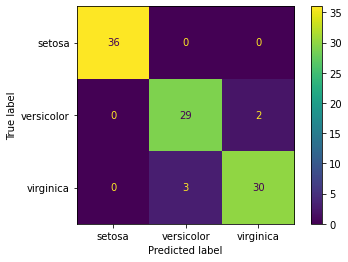

In [35]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmKnnTrain, display_labels=modelKnn.classes_ ).plot()

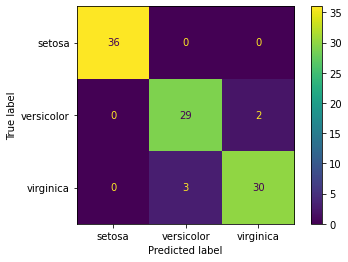

In [37]:
import matplotlib.pyplot
sklearn.metrics.ConfusionMatrixDisplay( cmKnnTrain, display_labels=modelKnn.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_KnnTrain.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [38]:
sklearn.metrics.accuracy_score( outcomeTrain, predKnnTrain )

0.95

In [39]:
predKnnTest = modelKnn.predict(featuresTest)

In [40]:
cmKnnTest = sklearn.metrics.confusion_matrix( outcomeTest, predKnnTest  )

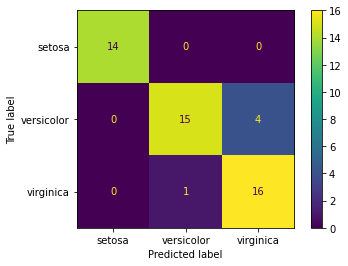

In [41]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmKnnTest, display_labels=modelKnn.classes_ ).plot()

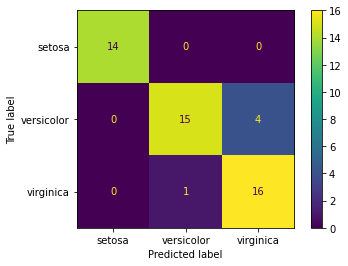

In [42]:
import matplotlib.pyplot
sklearn.metrics.ConfusionMatrixDisplay( cmKnnTest, display_labels=modelKnn.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_KnnTest.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [43]:
sklearn.metrics.accuracy_score( outcomeTest, predKnnTest )

0.9

## Decision Tree

In [44]:
import sklearn.tree

In [45]:
modelTree = sklearn.tree.DecisionTreeClassifier()

In [46]:
resultTree = modelTree.fit( featuresTrain, outcomeTrain )

In [47]:
predTreeTrain = modelTree.predict( featuresTrain )

In [48]:
cmTreeTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predTreeTrain  )

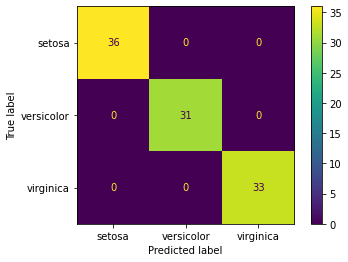

In [49]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmTreeTrain, display_labels=modelTree.classes_ ).plot()

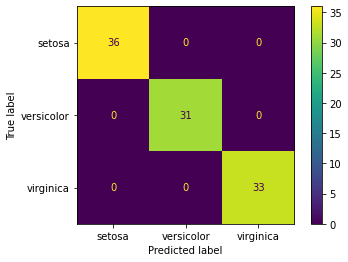

In [50]:
sklearn.metrics.ConfusionMatrixDisplay( cmTreeTrain, display_labels=modelTree.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_TreeTrain.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [51]:
sklearn.metrics.accuracy_score( outcomeTrain, predTreeTrain )

1.0

In [52]:
predTreeTest = modelTree.predict(featuresTest)

In [53]:
cmTreeTest = sklearn.metrics.confusion_matrix( outcomeTest, predTreeTest  )

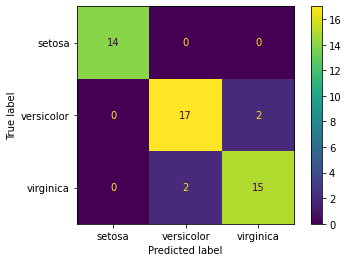

In [54]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmTreeTest, display_labels=modelTree.classes_ ).plot()

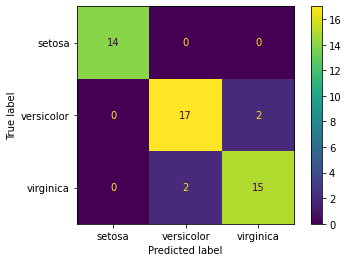

In [55]:
sklearn.metrics.ConfusionMatrixDisplay( cmTreeTest, display_labels=modelTree.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_TreeTest.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [56]:
sklearn.metrics.accuracy_score( outcomeTest, predTreeTest )

0.92

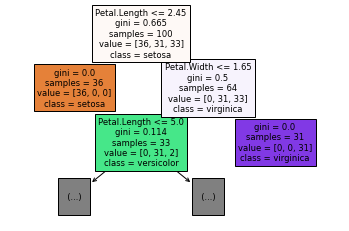

In [57]:
temp = sklearn.tree.plot_tree( resultTree, feature_names=list( features), filled=True, class_names=modelTree.classes_, max_depth=2 )

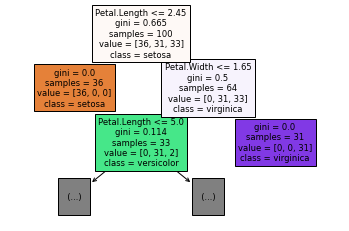

In [58]:
sklearn.tree.plot_tree( resultTree, feature_names=list( features), filled=True, class_names=modelTree.classes_, max_depth=2 )
matplotlib.pyplot.savefig( "iris_tree.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

## Logistic Regression

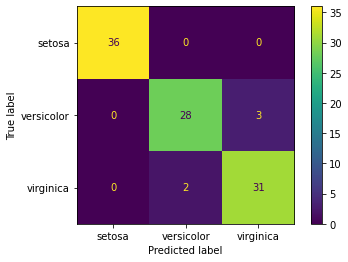

In [12]:
from sklearn.linear_model import LogisticRegression
modelLog = LogisticRegression(multi_class='ovr')
resultLog = modelLog.fit(featuresTrain, outcomeTrain)
predLogTrain = modelLog.predict( featuresTrain )
cmLogTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predLogTrain  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmLogTrain, display_labels=modelLog.classes_ ).plot()

In [13]:
sklearn.metrics.accuracy_score( outcomeTrain, predLogTrain )

0.95

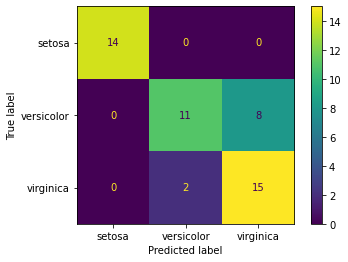

In [14]:
predLogTest = modelLog.predict(featuresTest)
cmLogTest = sklearn.metrics.confusion_matrix( outcomeTest, predLogTest  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmLogTest, display_labels=modelLog.classes_ ).plot()

In [15]:
sklearn.metrics.accuracy_score( outcomeTest, predLogTest )

0.8

## SVM

C:\Users\karpovsk\Miniconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


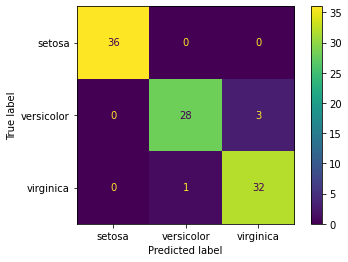

In [27]:
from sklearn import svm
modelSVM = svm.LinearSVC()
resultSVM = modelSVM.fit(featuresTrain, outcomeTrain)
predSVMTrain = modelSVM.predict( featuresTrain )
cmSVMTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predSVMTrain  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmSVMTrain, display_labels=modelSVM.classes_ ).plot()

In [28]:
sklearn.metrics.accuracy_score( outcomeTrain, predSVMTrain )

0.96

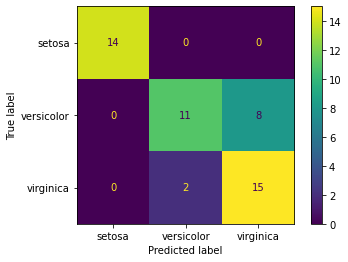

In [30]:
predSVMTest = modelLog.predict(featuresTest)
cmSVMTest = sklearn.metrics.confusion_matrix( outcomeTest, predSVMTest  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmSVMTest, display_labels=modelSVM.classes_ ).plot()

In [31]:
sklearn.metrics.accuracy_score( outcomeTest, predSVMTest )

0.8

## Naive Bayes

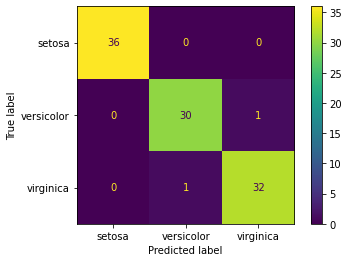

In [20]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
resultNB = modelNB.fit(featuresTrain, outcomeTrain)
predNBTrain = modelNB.predict( featuresTrain )
cmNBTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predNBTrain  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmNBTrain, display_labels=modelNB.classes_ ).plot()

In [21]:
sklearn.metrics.accuracy_score( outcomeTrain, predNBTrain )

0.98

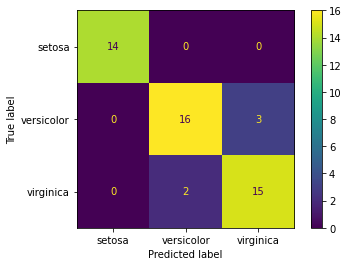

In [24]:
predNBTest = modelNB.predict(featuresTest)
cmNBTest = sklearn.metrics.confusion_matrix( outcomeTest, predNBTest  )
temp = sklearn.metrics.ConfusionMatrixDisplay( cmNBTest, display_labels=modelNB.classes_ ).plot()

In [25]:
sklearn.metrics.accuracy_score( outcomeTest, predNBTest )

0.9

## Random Forest

In [59]:
import sklearn.ensemble 
modelForest = sklearn.ensemble.RandomForestClassifier()

In [60]:
resultForest = modelForest.fit( featuresTrain, outcomeTrain )

In [61]:
predForestTrain = modelForest.predict(featuresTrain)

In [62]:
cmForestTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predForestTrain  )

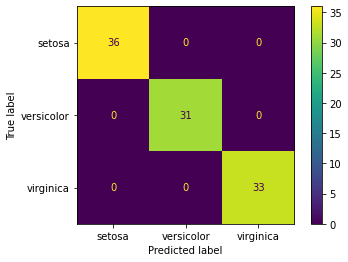

In [63]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmForestTrain, display_labels=modelForest.classes_ ).plot()

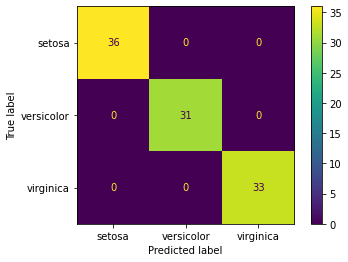

In [64]:
sklearn.metrics.ConfusionMatrixDisplay( cmForestTrain, display_labels=modelForest.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_ForestTest.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [65]:
sklearn.metrics.accuracy_score( outcomeTrain, predForestTrain )

1.0

In [66]:
predForestTest = modelForest.predict(featuresTest)

In [67]:
cmForestTest = sklearn.metrics.confusion_matrix( outcomeTest, predForestTest  )

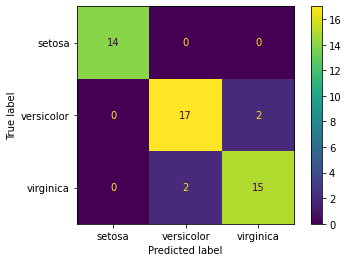

In [68]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmForestTest, display_labels=modelForest.classes_ ).plot()

In [69]:
sklearn.metrics.accuracy_score( outcomeTest, predForestTest )

0.92

## Neural Net

In [70]:
import sklearn.neural_network 

In [71]:
modelNeural = sklearn.neural_network.MLPClassifier( hidden_layer_sizes=(10,5) )


In [72]:
modelNeural.fit( featuresTrain, outcomeTrain )

/Users/ransboth/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5))

In [73]:
predNeuralTrain = modelNeural.predict(featuresTrain)

In [74]:
cmNeuralTrain = sklearn.metrics.confusion_matrix( outcomeTrain, predNeuralTrain  )

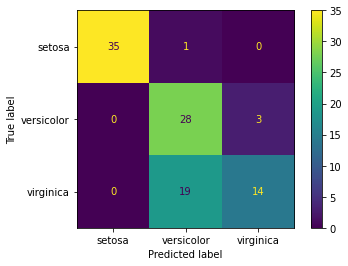

In [75]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmNeuralTrain, display_labels=modelNeural.classes_ ).plot()

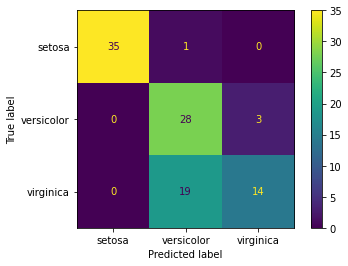

In [76]:
sklearn.metrics.ConfusionMatrixDisplay( cmNeuralTrain, display_labels=modelNeural.classes_ ).plot()
matplotlib.pyplot.savefig( "iris_NeuralTrain.pdf", orientation='landscape', transparent=True, pad_inches=0.0 )

In [77]:
sklearn.metrics.accuracy_score( outcomeTrain, predNeuralTrain )

0.77

In [78]:
predNeuralTest = modelNeural.predict(featuresTest)

In [79]:
cmNeuralTest = sklearn.metrics.confusion_matrix( outcomeTest, predNeuralTest  )

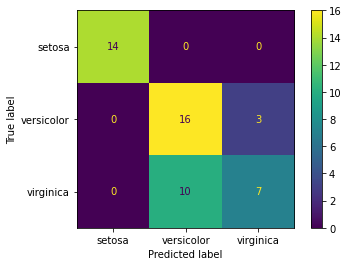

In [80]:
temp = sklearn.metrics.ConfusionMatrixDisplay( cmNeuralTest, display_labels=modelNeural.classes_ ).plot()

In [81]:
sklearn.metrics.accuracy_score( outcomeTest, predNeuralTest )

0.74

## Comparing

In [82]:
sklearn.metrics.accuracy_score( outcomeTrain, predKnnTrain ).round(3)

0.95

In [83]:
sklearn.metrics.accuracy_score( outcomeTrain, predTreeTrain ).round(3)

1.0

In [84]:
sklearn.metrics.accuracy_score( outcomeTrain, predForestTrain ).round(3)

1.0

In [85]:
sklearn.metrics.accuracy_score( outcomeTrain, predNeuralTrain ).round(3)

0.77

In [18]:
sklearn.metrics.accuracy_score( outcomeTrain, predLogTrain ).round(3)

0.95

In [23]:
sklearn.metrics.accuracy_score( outcomeTrain, predNBTrain )

0.98

In [29]:
sklearn.metrics.accuracy_score( outcomeTrain, predSVMTrain )

0.96

In [86]:
sklearn.metrics.accuracy_score( outcomeTest, predKnnTest ).round(3)

0.9

In [87]:
sklearn.metrics.accuracy_score( outcomeTest, predTreeTest ).round(3)

0.92

In [88]:
sklearn.metrics.accuracy_score( outcomeTest, predForestTest ).round(3)

0.92

In [89]:
sklearn.metrics.accuracy_score( outcomeTest, predNeuralTest ).round(3)

0.74

In [19]:
sklearn.metrics.accuracy_score( outcomeTest, predLogTest ).round(3)

0.8

In [26]:
sklearn.metrics.accuracy_score( outcomeTest, predNBTest )

0.9

In [33]:
sklearn.metrics.accuracy_score( outcomeTest, predSVMTest )

0.8